Basic imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%load_ext nb_black

plt.style.use("ggplot")

<IPython.core.display.Javascript object>

Importing data

In [2]:
train_df = pd.read_csv("merged_train.csv")
test_df = pd.read_csv("merged_test.csv")

<IPython.core.display.Javascript object>

### 2-2. EDA

**2-2-1**. General information.

In [3]:
train_df.shape

(307511, 221)

<IPython.core.display.Javascript object>

In [4]:
test_df.shape

(48744, 220)

<IPython.core.display.Javascript object>

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 221 entries, SK_ID_CURR to PREV_COUNTS
dtypes: float64(164), int64(41), object(16)
memory usage: 518.5+ MB


<IPython.core.display.Javascript object>

The majority of dataset is already numerical, however some categorical values will be one hot encoded during feature engineering part.

**2-2-2** Target distribution.

In [6]:
train_df.describe().iloc[:, :2]

,SK_ID_CURR,TARGET
count,307511.000000,307511.000000
mean,278180.518577,0.080729
std,102790.175348,0.272419
min,100002.000000,0.000000
25%,189145.500000,0.000000
50%,278202.000000,0.000000
75%,367142.500000,0.000000
max,456255.000000,1.000000


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Target distribution')

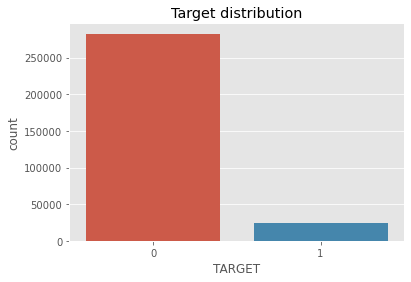

<IPython.core.display.Javascript object>

In [7]:
sns.countplot(train_df.TARGET)
plt.title("Target distribution")

The highest portion of dataset have target value of 0. I will keep that in mind and if the model fails to predict on cross validation (in that case I will extract all 1 values and randomly choose same amount of data with target value 0).

**2-2-3** Correlations.

In [8]:
# extracting 10 most positive correlations and 10 most negative correlations and putting into df
pos_corr_df = pd.DataFrame(train_df.corr()["TARGET"].sort_values(ascending=False)[1:12])
neg_corr_df = pd.DataFrame(train_df.corr()["TARGET"].sort_values(ascending=True)[:11])

# concating dfs
corr_df = pd.concat([pos_corr_df, neg_corr_df])

<IPython.core.display.Javascript object>

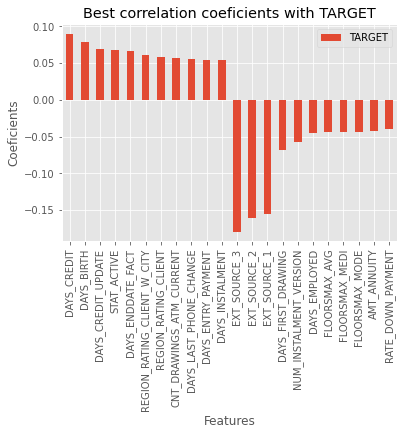

<IPython.core.display.Javascript object>

In [9]:
corr_df.plot(kind="bar")
plt.title("Best correlation coeficients with TARGET")
plt.xlabel("Features")
plt.ylabel("Coeficients")
plt.show()

There are no moderate correlation between features and target. In feature engineering part, I will try to implement more new features that might have higher scores.

**2-2-4** Feature distribution for first 10 numerical features.

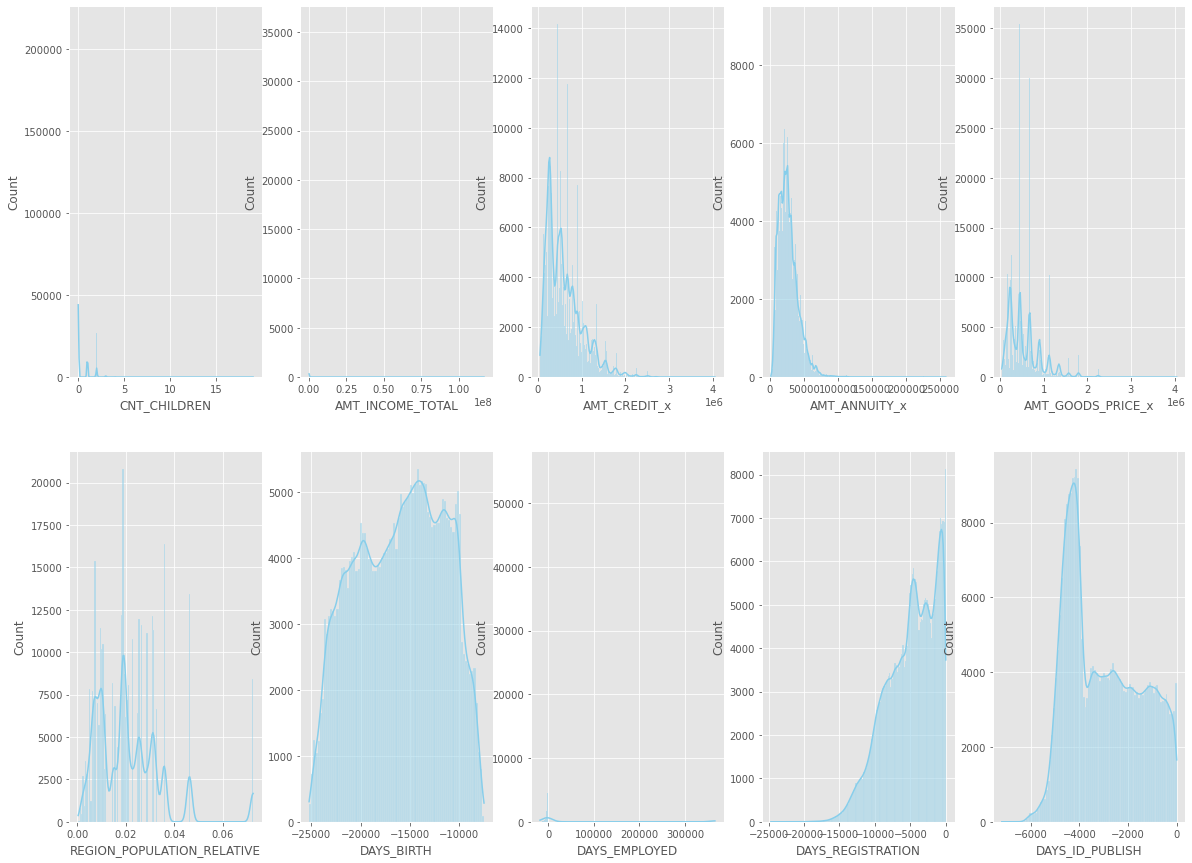

<IPython.core.display.Javascript object>

In [10]:
# extracting first 10 numerical features
numerical_features = train_df.select_dtypes(include=np.number).columns.tolist()[2:12]

# plotting distribution
fig, axs = plt.subplots(2, 5, figsize=(20, 15))

for i in range(10):
    col_str = str(numerical_features[i])
    if i < 5:
        sns.histplot(data=train_df, x=col_str, kde=True, color="skyblue", ax=axs[0, i])
    else:
        sns.histplot(
            data=train_df, x=col_str, kde=True, color="skyblue", ax=axs[1, i - 5]
        )

plt.show()

It is seen that normal distribution does not appear in most cases.

**2-2-5** Missing values.

In [11]:
# extracting NaN counts for train and test datasets
train_nan = train_df.isna().sum().sort_values(ascending=False)
test_nan = test_df.isna().sum().sort_values(ascending=False)

<IPython.core.display.Javascript object>

In [12]:
# creating NaN values df
nan_df = pd.DataFrame({"Train": train_nan, "Test": test_nan})

<IPython.core.display.Javascript object>

In [19]:
nan_df.sort_values(by=["Train"], ascending=False)

,Train,Test
COMMONAREA_MEDI,214865,33495.0
COMMONAREA_MODE,214865,33495.0
COMMONAREA_AVG,214865,33495.0
NONLIVINGAPARTMENTS_MEDI,213514,33347.0
NONLIVINGAPARTMENTS_MODE,213514,33347.0
...,...,...
NAME_EDUCATION_TYPE,0,0.0
NAME_CONTRACT_TYPE,0,0.0
FLAG_DOCUMENT_13,0,0.0
FLAG_DOCUMENT_14,0,0.0


<IPython.core.display.Javascript object>

There are lots of missing values in both datasets that need to be filled. Moreover, NaNs could create some bias in datasets.